# Polynomial Part 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2014-01-01'
end = '2019-01-01'

# Read data 
dataset = yf.download(symbol,start,end)

# View Columns
dataset.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,3.85,3.98,3.84,3.95,3.95,20548400
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100
2014-01-08,4.23,4.26,4.14,4.18,4.18,30678700


In [3]:
dataset['Increase_Decrease'] = np.where(dataset['Volume'].shift(-1) > dataset['Volume'],1,0)
dataset['Buy_Sell_on_Open'] = np.where(dataset['Open'].shift(-1) > dataset['Open'],1,0)
dataset['Buy_Sell'] = np.where(dataset['Adj Close'].shift(-1) > dataset['Adj Close'],1,0)
dataset['Returns'] = dataset['Adj Close'].pct_change()
dataset = dataset.dropna()
dataset.head()

,Open,High,Low,Close,Adj Close,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
Date,,,,,,,,,,
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200,1,1,1,0.012658
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300,1,1,1,0.032500
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100,0,1,0,0.012107
2014-01-08,4.23,4.26,4.14,4.18,4.18,30678700,0,0,0,0.000000
2014-01-09,4.20,4.23,4.05,4.09,4.09,30667600,0,0,1,-0.021531


In [4]:
dataset.shape

(1257, 10)

In [13]:
X = dataset['Open'].values
y = dataset['Adj Close'].values

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

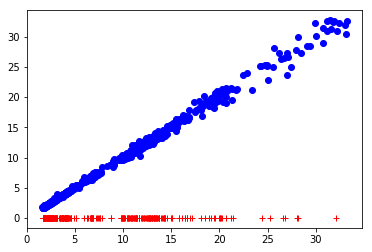

In [15]:
plt.plot(X_train, y_train, 'bo')
plt.plot(X_test, np.zeros_like(X_test), 'r+')

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train.reshape(-1, 1), y_train)
preds = model.predict(X_test.reshape(-1, 1))
preds[:3]

array([ 13.72679402,   3.65117701,  10.97345709])

In [17]:
# fit-predict-evaluate a 1D polynomial (a line)
model_one = np.poly1d(np.polyfit(X_train, y_train,
1))
preds_one = model_one(X_test)
print(preds_one[:3])

[ 13.72679402   3.65117701  10.97345709]


# Polynomial

In [22]:
from sklearn.metrics import mean_squared_error

# the predictions come back the same
print("all close?", np.allclose(preds, preds_one))
# and we can still use sklearn to evaluate it
mse = mean_squared_error
print("RMSE:", np.sqrt(mse(y_test, preds_one)))

all close? True
RMSE: 0.30372614873


In [23]:
# fit-predict-evaluate a 2D polynomial (a parabola)
model_two = np.poly1d(np.polyfit(X_train, y_train,
2))
preds_two = model_two(X_test)
print("RMSE:", np.sqrt(mse(y_test, preds_two)))

RMSE: 0.303129198176


In [24]:
model_three = np.poly1d(np.polyfit(X_train, y_train, 9))
preds_three = model_three(X_test)
print("RMSE:", np.sqrt(mse(y_test, preds_three)))

RMSE: 0.311489430887


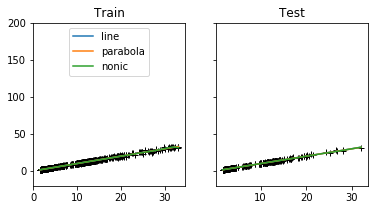

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(6, 3),sharey=True)
labels = ['line', 'parabola', 'nonic']
models = [model_one, model_two, model_three]
train = (X_train, y_train)
test = (X_test, y_test)
for ax, (ftr, tgt) in zip(axes, [train, test]):
    ax.plot(ftr, tgt, 'k+')
    for m, lbl in zip(models, labels):
        ftr = sorted(ftr)
        ax.plot(ftr, m(ftr), '-', label=lbl)
axes[1].set_ylim(-20, 200)
axes[0].set_title("Train")
axes[1].set_title("Test");
axes[0].legend(loc='upper center');

In [35]:
results = []
for complexity in [1, 2, 3, 4, 5, 6,7,8, 9]:
    model = np.poly1d(np.polyfit(X_train, y_train, complexity))
    train_error = np.sqrt(mse(y_train, model(X_train)))
    test_error = np.sqrt(mse(y_test,model(X_test)))
    results.append((complexity, train_error, test_error))
columns = ["Complexity", "Train Error", "Test Error"]
results_df = pd.DataFrame.from_records(results, columns=columns,index="Complexity")
results_df    

,Train Error,Test Error
Complexity,,
1,0.391407,0.303726
2,0.390389,0.303129
3,0.389416,0.302708
4,0.388973,0.301861
5,0.388792,0.301053
6,0.386892,0.304473
7,0.380734,0.314353
8,0.379176,0.312722
9,0.378642,0.311489


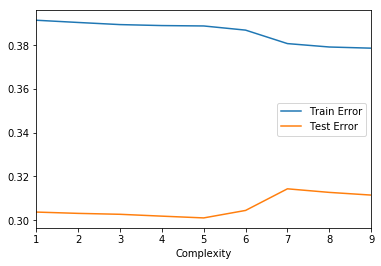

In [36]:
results_df.plot()